In [2]:
# ✅ Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# ✅ Load Titanic dataset
df = sns.load_dataset('titanic')
print(df.shape)
df.head()


(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:

print(df.isnull().sum())


df = df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male'], axis=1)


df = df.dropna()

print(df.isnull().sum())
df.head()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
alone       0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,False
1,1,1,female,38.0,1,0,71.2833,C,First,False
2,1,3,female,26.0,0,0,7.9250,S,Third,True
3,1,1,female,35.0,1,0,53.1000,S,First,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True


In [5]:

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})

print(df.head())


   survived  pclass  sex   age  sibsp  parch     fare  embarked class  alone
0         0       3    0  22.0      1      0   7.2500         2     3  False
1         1       1    1  38.0      1      0  71.2833         0     1  False
2         1       3    1  26.0      0      0   7.9250         2     3   True
3         1       1    1  35.0      1      0  53.1000         2     1  False
4         0       3    0  35.0      0      0   8.0500         2     3   True


In [6]:

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(569, 7) (143, 7)


In [7]:
# ✅ Create and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [2.86618122]
Coefficients: [[-1.30175847e+00  2.56202444e+00 -3.73843949e-02 -3.30634858e-01
   5.58611363e-03 -6.10932715e-04 -1.16035928e-01]]


In [8]:
# ✅ Predict
y_pred = model.predict(X_test)

# ✅ Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ✅ Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.80
Confusion Matrix:
 [[73  7]
 [22 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



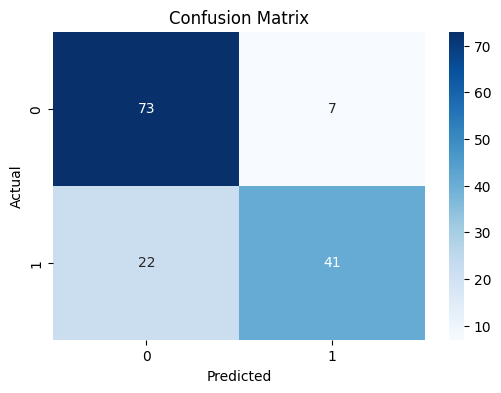

In [9]:
# ✅ Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
